In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import math
import random
import time
import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import operator
%matplotlib inline

In [377]:
#Loading data into the files :
df_confirmed = pd.read_csv("time_series_covid_19_confirmed.csv")
df_deaths = pd.read_csv("time_series_covid_19_deaths.csv")
df_recovered = pd.read_csv("time_series_covid_19_recovered.csv")

In [378]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [394]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,1,1,1,2,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,4,5,5,6,8,10,10,11
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,15,17,17,19,21,25,26,29,31,35
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,1,1,1,1,3,3,3,6,8
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [380]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,10,17,17,31,31,33,44
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,32,65,65,24,65,29,29,31,31,37
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [395]:
#Extracting the date columns info :
confirmed = df_confirmed.iloc[:,4::]
deaths = df_deaths.iloc[:,4::]
recovered = df_recovered.iloc[:,4::]

In [396]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,0,0,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,0,0,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,0,0,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,0,0,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,0,0,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [400]:
# now finding the total sum of cases on bases of the dates :
def get_covid_sum():
    total_cases = []
    total_deaths = []
    total_recovered = []
    total_mortality = []
    total_recovery = []
    totaldeaths = 0
    totalcases = 0
    totalrecovered = 0
    total_us  = []
    total_china = []
    total_italy = []
    total_india  = []
    for item in confirmed.keys():
        #print(item)
        totalcases = confirmed[item].sum()
        totalrecovered = recovered[item].sum()
        totaldeaths = deaths[item].sum()
        total_cases.append(totalcases)
        total_deaths.append(totaldeaths)
        total_recovered.append(totalrecovered)
        total_mortality.append(totaldeaths/totalcases)
        total_recovery.append(totalrecovered/totalcases) 
        
        #case study by countries
        total_us.append(df_confirmed[df_confirmed["Country/Region"] == "US"][item].sum())
        total_china.append(df_confirmed[df_confirmed["Country/Region"] == "China"][item].sum())
        total_italy.append(df_confirmed[df_confirmed["Country/Region"] == "Italy"][item].sum())
        total_india.append(df_confirmed[df_confirmed["Country/Region"] == "India"][item].sum())
        
    return total_cases,total_deaths,total_recovered,total_mortality,total_recovery,total_us,total_china,total_italy,total_india

In [402]:
total_cases,total_deaths,total_recovered,total_mortality,total_recovery,total_us,total_china,total_italy,total_india = get_covid_sum()

In [403]:
# Get daily increase data :

def get_dailycases(data):
    d= []
    for item in range(0,len(data)):
        if item == 0:
            #print("At Day "  +  str(item) + " "  +  str(total_cases[0]))
            d.append(data[0])
        else:
            d.append(data[item]-data[item-1])
            #print("At Day "  +  str(item) + " "  +  str(total_cases[item]-total_cases[item-1]))
            #print(total_cases[item]-total_cases[item-1])
    return d

In [409]:
total_us_daily = get_dailycases(total_us)
total_cases_daily  = get_dailycases(total_cases)
total_india_daily  = get_dailycases(total_india)

In [419]:
days_since_1_22   = np.array([i for i in range(len(confirmed.keys()))]).reshape(-1,1)
total_cases = np.array(total_cases).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_india  = np.array(total_india).reshape(-1, 1)

In [443]:
# Future Forecast for next 15 days:
days_future = 15
future_forecast = np.array([i for i in range(len(confirmed.keys()) + days_future)]).reshape(-1,1)
main_dates = future_forecast[:-15]

In [410]:
start = '01/22/2020'#str(confirmed.keys()[0])
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

In [444]:
# Converting Dates into the Datetime
main_dates2 = []
for item in range(len(main_dates)):
    main_dates2.append((start_date + datetime.timedelta(days=item)).strftime('%m/%d/%Y'))

#main_dates2 = np.array([forcast_dates[i] for i in range(len(forcast_dates))]).reshape(-1,1)

forcast_dates = []
for item in range(len(future_forecast)):
    #forcast_dates.append(start_date + datetime.timedelta(days=item))
    forcast_dates.append((start_date + datetime.timedelta(days=item)).strftime('%m/%d/%Y'))
    
forcast_dates = np.array([forcast_dates[i] for i in range(len(forcast_dates))]).reshape(-1,1)
#np.array(forcast_dates[1]).reshape(-1,1)

In [459]:
# a generic ml model function 
def ml_model(X,Y):
    X_train, X_test, y_train, y_test_confirmed = train_test_split(X, Y, test_size=0.05, shuffle=False)
    #implementing the polynomial regression
    poly = PolynomialFeatures(degree=6)
    poly_X_train = poly.fit_transform(X_train)
    poly_X_test = poly.fit_transform(X_test)
    poly_future_forcast = poly.fit_transform(future_forecast)
    #implementing the linear regression
    model = LinearRegression(normalize=True, fit_intercept=False)
    model.fit(poly_X_train, y_train)
    test_linear_pred = model.predict(poly_X_test)
    linear_pred = model.predict(poly_future_forcast)
    return linear_pred,test_linear_pred,y_test_confirmed

#For india
linear_pred_india,test_linear_pred_india,y_test_confirmed_india = ml_model(days_since_1_22,total_india)
linear_pred_deaths,test_linear_pred_deaths,y_test_confirmed_deaths = ml_model(days_since_1_22,total_deaths)

In [446]:
# Starting ML Model :

# Break the data into the test and train split:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_india, test_size=0.05, shuffle=False)


# transform our data for polynomial regression
poly = PolynomialFeatures(degree=6)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forecast)

# Implementing the model LinearRegression

model = LinearRegression(normalize=True, fit_intercept=False)
#model.fit(X_train_confirmed,y_train_confirmed)
model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = model.predict(poly_X_test_confirmed)
linear_pred = model.predict(poly_future_forcast)

print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))


print(model.coef_)

MAE: 102.06626417912412
MSE: 16514.133620061275
[[ 4.75407745e+00 -5.27386696e+00  1.12778456e+00 -8.81651802e-02
   3.15446469e-03 -5.28196444e-05  3.40100691e-07]]


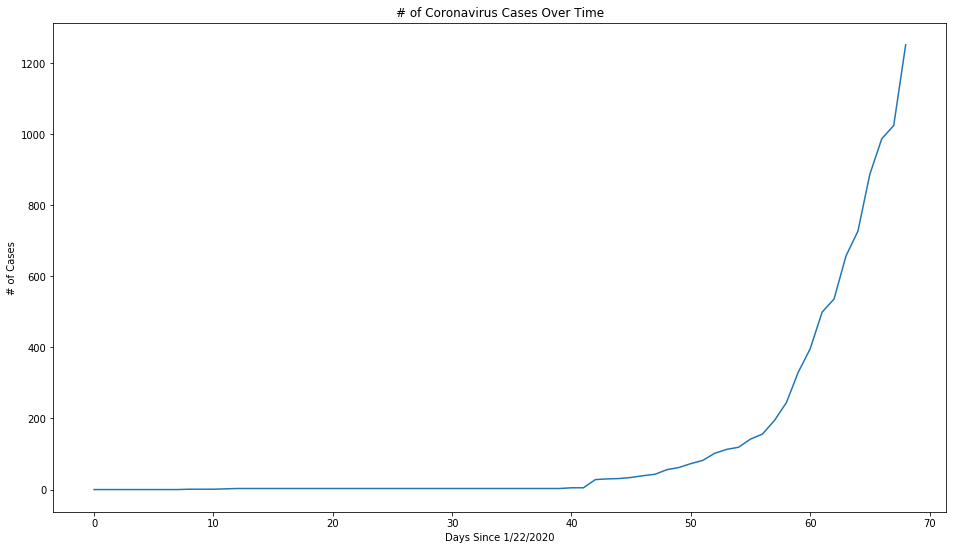

In [460]:
# Graphical Representation of Covid 19 Cases in India :
plt.figure(figsize=(16, 9))
plt.plot(main_dates, total_india)
plt.title('# of Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
##plt.xticks(size=20)
##plt.yticks(size=20)
plt.show()

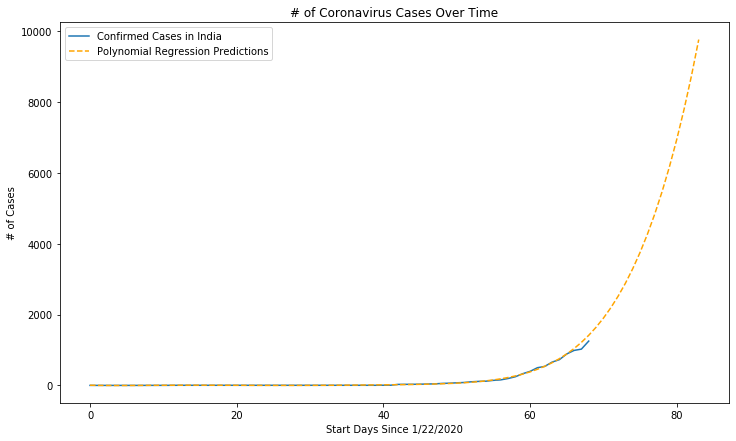

In [461]:
# Prediction of covid 19 Cases in India for next 14 days 

plt.figure(figsize=(12, 7))
plt.plot(main_dates, total_india)
plt.plot(future_forecast, linear_pred_india, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time')
plt.xlabel('Start Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['Confirmed Cases in India', 'Polynomial Regression Predictions'], prop={'size': 10})
plt.show()

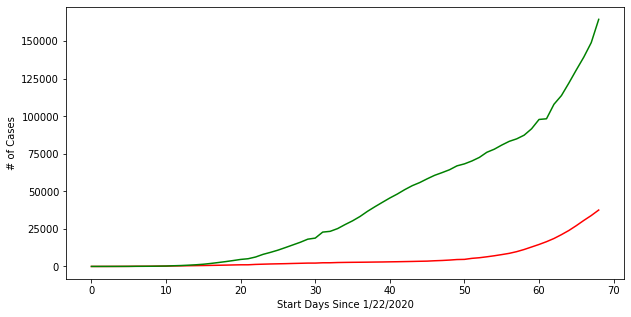

In [451]:
#future_forecast
#main_dates2
#forcast_dates
#main_dates

#Graph Between deaths and Recovery:
plt.figure(figsize=(10, 5))
plt.plot(main_dates, total_deaths,color = "red")
plt.plot(main_dates, total_recovered, color='green')
plt.xlabel('Start Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()

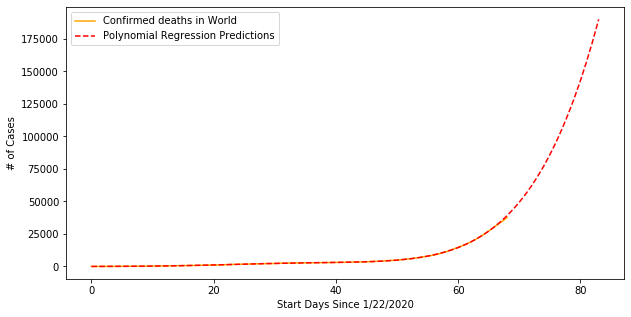

In [462]:
# Total deaths Forecast :

plt.figure(figsize=(10, 5))
plt.plot(main_dates, total_deaths,color = "Orange")
plt.plot(future_forecast, linear_pred_deaths,linestyle="dashed", color='Red')
plt.xlabel('Start Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['Confirmed deaths in World', 'Polynomial Regression Predictions'], prop={'size': 10})
plt.show()

# 80 K deaths in next 10 days predicted 

In [620]:
# Get the confusion matrix and classification Report
from sklearn.metrics import confusion_matrix,classification_report

#print(confusion_matrix(y_test_confirmed,test_linear_pred))
#print("\n")
#print(classification_report(test_linear_pred, y_test_confirmed))
# Get cases Country Wise :
country_confirmed_cases = []

unique_countries =  list(df_confirmed['Country/Region'].unique())
len(unique_countries)
#country_data = df_confirmed.groupby("Country/Region").sum()
#country_data = country_data.reset_index()

178

In [646]:
dates = confirmed.keys()
latest_dates = dates[-1]
df_countries = df_confirmed.iloc[:, [1] + [-1]]
df_countries = df_countries.groupby("Country/Region").sum()
df_countries = df_countries.reset_index()
df_countries.sort_values(by = latest_dates,ascending= False)

,Country/Region,3/30/20
166,US,161807
83,Italy,101739
151,Spain,87956
35,China,82198
64,Germany,66885
60,France,45170
79,Iran,41495
170,United Kingdom,22453
156,Switzerland,15922
16,Belgium,11899


,level_0,index,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,0,0,Afghanistan,33.000000,65.000000,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,1,1,Albania,41.153300,20.168300,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,2,2,Algeria,28.033900,1.659600,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,3,3,Andorra,42.506300,1.521800,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,4,4,Angola,-11.202700,17.873900,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7
5,5,5,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,...,1,1,3,3,3,7,7,7,7,7
6,6,6,Argentina,-38.416100,-63.616700,0,0,0,0,0,...,158,266,301,387,387,502,589,690,745,820
7,7,7,Armenia,40.069100,45.038200,0,0,0,0,0,...,160,194,235,249,265,290,329,407,424,482
8,8,8,Australia,-255.969500,1129.862300,0,0,0,0,4,...,1071,1549,1682,2044,2364,2810,3143,3640,3984,4361
9,9,9,Austria,47.516200,14.550100,0,0,0,0,0,...,2814,3582,4474,5283,5588,6909,7657,8271,8788,9618


In [563]:
X_train_confirmed

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64]])

In [357]:
y_train_confirmed

array([[   17],
       [   18],
       [   26],
       [   42],
       [   56],
       [   82],
       [  131],
       [  133],
       [  171],
       [  213],
       [  259],
       [  362],
       [  426],
       [  492],
       [  564],
       [  634],
       [  719],
       [  806],
       [  906],
       [ 1013],
       [ 1113],
       [ 1118],
       [ 1371],
       [ 1523],
       [ 1666],
       [ 1770],
       [ 1868],
       [ 2007],
       [ 2122],
       [ 2247],
       [ 2251],
       [ 2458],
       [ 2469],
       [ 2629],
       [ 2708],
       [ 2770],
       [ 2814],
       [ 2872],
       [ 2941],
       [ 2996],
       [ 3085],
       [ 3160],
       [ 3254],
       [ 3348],
       [ 3460],
       [ 3558],
       [ 3802],
       [ 3988],
       [ 4262],
       [ 4615],
       [ 4720],
       [ 5404],
       [ 5819],
       [ 6440],
       [ 7126],
       [ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973],
       [14651]], dtype=int64)